In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

##### 血液データとバイタルデータ、病名データを結合したcsvファイルの読み込み

In [2]:
vital_blood_entdisease = pd.read_csv('pID_vital_blood_entdisease.csv')

In [3]:
vital_blood_entdisease

,Unnamed: 0,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR
0,0,127820,93.0,12.9,14.1,52.0,54.0,2.08,148.0,4.7,0.22,36.1,66.0,8.0,脱水、CO2ナルコーシス,1.01
1,1,306430,95.0,11.1,23.8,58.0,49.0,0.74,140.0,4.1,10.14,37.1,60.0,26.0,S状結腸穿孔,1.15
2,2,400695,0.0,0.0,0.0,75.0,43.0,0.77,140.0,4.3,10.68,38.1,68.0,15.0,食道癌,1.08
3,3,435983,105.0,13.2,20.2,26.0,19.0,0.78,142.0,3.6,14.18,38.0,134.0,26.0,S状結腸捻転術後,1.32
4,4,453006,113.0,9.0,26.9,42.0,15.0,1.10,131.0,4.4,11.40,36.3,77.0,20.0,肺炎・心不全,0.97
5,5,485887,140.0,9.9,34.6,46.0,9.0,0.57,144.0,4.7,18.35,38.3,110.0,19.0,CPA蘇生後,0.99
6,6,553113,143.0,7.6,29.2,12.0,10.0,12.13,137.0,5.7,12.31,34.6,110.0,24.0,顕微鏡的多発血管炎,1.01
7,7,573304,25.0,3.7,8.8,421.0,360.0,1.33,145.0,5.2,0.16,36.4,144.0,18.0,仮性肝動脈瘤、消化管出血、出血性ショック,1.76
8,8,602684,67.0,10.7,20.0,29.0,14.0,0.80,137.0,5.1,2.16,37.6,91.0,20.0,上腸間膜動脈塞栓,0.90
9,9,602684,67.0,10.7,20.0,29.0,14.0,0.80,137.0,5.1,2.16,37.6,91.0,20.0,上腸間膜動脈塞栓,0.95


In [4]:
print(vital_blood_entdisease.isnull().sum())

Unnamed: 0     0
pID            0
WBC            0
Hb             0
PLT            0
AST            0
ALT            0
Cre            0
Na             0
K              0
CRP            0
BT             0
PR             0
RR             0
ent_disease    0
PTINR          4
dtype: int64


##### 病名の分割はexcelで行い、pID_vital_blood_entdisease_splitという名前のcsvファイルに保存した

In [5]:
vital_blood_entdisease_split = pd.read_csv('pID_vital_blood_entdisease_split.csv')

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
vital_blood_entdisease_split

,pID_vital_blood_entdisease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,NaN,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6.0,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
vital_blood_entdisease_split = vital_blood_entdisease_split[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']]
vital_blood_entdisease_split
                                                            

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01


In [9]:
vital_blood_entdisease_split.columns = ['pID', 'WBC', 'Hb', 'PLT', 'AST', 'ALT', 'Cre', 'Na', 'K', 'CRP', 'BT', 'PR', 'RR', 'ent_disease', 'PTINR']
vital_blood_entdisease_split = vital_blood_entdisease_split.drop(index = 0)
vital_blood_entdisease_split

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,出血性ショック,1.76


##### 病名の列だけ抽出してリスト化し、中身を確認すると改行のために\n, \u3000が含まれている

In [10]:
ent_disease_list = vital_blood_entdisease_split['ent_disease'].tolist()
ent_disease_list

['CO2ナルコーシス',
 '脱水',
 'S状結腸穿孔',
 '食道癌',
 'S状結腸捻転術後',
 '肺炎',
 '心不全',
 'CPA蘇生後',
 '顕微鏡的多発血管炎',
 '出血性ショック',
 '仮性肝動脈瘤',
 '消化管出血',
 '上腸間膜動脈塞栓',
 '出血性胃潰瘍',
 '腎不全',
 '心不全',
 '下部消化管穿孔',
 'CPA蘇生後',
 '肋骨骨折',
 '腎内血腫',
 'CPA蘇生後',
 '溢頚',
 '髄膜腫',
 'うっ血性心不全',
 'CRBSI',
 '肺炎',
 'レジオネラ肺炎',
 'CPA蘇生後',
 '右前頭葉皮質下出血',
 'Septic emboli',
 '腎盂腎炎',
 '胆管炎',
 '急性心筋梗塞',
 '敗血症',
 'イレウス',
 '腰部脊柱管狭窄症',
 '腰椎破裂骨折',
 '腸間膜損傷',
 '化膿性脊椎炎術後',
 '髄膜炎疑い',
 '椎体炎',
 '腸腰筋膿瘍',
 '左下腿壊死性筋膜炎',
 '心肺停止蘇生後',
 '小脳梗塞',
 'CPA蘇生後',
 'S.bovis菌血症',
 '意識障害',
 '肺炎',
 '\n肺炎',
 '肺化膿症\n',
 '\n心不全\u3000',
 '腹部刺傷',
 'CPA蘇生後',
 '\n敗血症性ショック',
 '腎盂腎炎\n',
 '肺炎',
 'CPA蘇生後',
 '心不全',
 '心不全',
 '肺炎',
 '下血',
 '腎盂腎炎',
 'CPA蘇生後',
 '心不全',
 '破傷風疑い',
 'CPA蘇生後',
 '低血糖',
 '肺炎',
 'CPA蘇生後',
 '腎不全',
 '心不全',
 '心肺停止蘇生後',
 '急性大動脈解離',
 '心不全',
 '肺炎',
 '呼吸不全',
 'CPA蘇生後',
 '腎不全',
 '心不全',
 '胆嚢穿孔',
 'たこつぼ心筋症',
 'SAH',
 '左上葉肺癌',
 '食道裂孔ヘルニア嵌頓',
 '大腿骨転子部骨折\n',
 '\n軟骨肉腫',
 '誤嚥性肺炎（院内肺炎）',
 '肺炎',
 'E.coli',
 '腎盂腎炎',
 'ESBL',
 '溢水',
 '心不全',
 'GGS菌血症',
 '敗血症性ショック',
 '心肺停止蘇生後',
 '高Mg血症

##### \n, \u3000を空欄に置換する

In [11]:
ent_disease_list_arr = [str(i) for i in ent_disease_list]
string = ",".join(ent_disease_list_arr)
string_new = string.replace('\n', '')
ent_disease_list_replace =  string_new.split(",")
print(ent_disease_list_replace)

['CO2ナルコーシス', '脱水', 'S状結腸穿孔', '食道癌', 'S状結腸捻転術後', '肺炎', '心不全', 'CPA蘇生後', '顕微鏡的多発血管炎', '出血性ショック', '仮性肝動脈瘤', '消化管出血', '上腸間膜動脈塞栓', '出血性胃潰瘍', '腎不全', '心不全', '下部消化管穿孔', 'CPA蘇生後', '肋骨骨折', '腎内血腫', 'CPA蘇生後', '溢頚', '髄膜腫', 'うっ血性心不全', 'CRBSI', '肺炎', 'レジオネラ肺炎', 'CPA蘇生後', '右前頭葉皮質下出血', 'Septic emboli', '腎盂腎炎', '胆管炎', '急性心筋梗塞', '敗血症', 'イレウス', '腰部脊柱管狭窄症', '腰椎破裂骨折', '腸間膜損傷', '化膿性脊椎炎術後', '髄膜炎疑い', '椎体炎', '腸腰筋膿瘍', '左下腿壊死性筋膜炎', '心肺停止蘇生後', '小脳梗塞', 'CPA蘇生後', 'S.bovis菌血症', '意識障害', '肺炎', '肺炎', '肺化膿症', '心不全\u3000', '腹部刺傷', 'CPA蘇生後', '敗血症性ショック', '腎盂腎炎', '肺炎', 'CPA蘇生後', '心不全', '心不全', '肺炎', '下血', '腎盂腎炎', 'CPA蘇生後', '心不全', '破傷風疑い', 'CPA蘇生後', '低血糖', '肺炎', 'CPA蘇生後', '腎不全', '心不全', '心肺停止蘇生後', '急性大動脈解離', '心不全', '肺炎', '呼吸不全', 'CPA蘇生後', '腎不全', '心不全', '胆嚢穿孔', 'たこつぼ心筋症', 'SAH', '左上葉肺癌', '食道裂孔ヘルニア嵌頓', '大腿骨転子部骨折', '軟骨肉腫', '誤嚥性肺炎（院内肺炎）', '肺炎', 'E.coli', '腎盂腎炎', 'ESBL', '溢水', '心不全', 'GGS菌血症', '敗血症性ショック', '心肺停止蘇生後', '高Mg血症', 'イレウス', 'SAH', 'CPA蘇生後', 'TBLB後喀血', '肺炎', '痙攣重積', '下部消化管穿孔', '汎血球減少症', '左被殻出血', 'アルコール中毒', 'CPA蘇生後', '心不全', 

In [12]:
ent_disease_list_arr = [str(i) for i in ent_disease_list_replace]
string = ",".join(ent_disease_list_arr)
string_new = string.replace('\u3000', '')
ent_disease_list_replace =  string_new.split(",")
print(ent_disease_list_replace)

['CO2ナルコーシス', '脱水', 'S状結腸穿孔', '食道癌', 'S状結腸捻転術後', '肺炎', '心不全', 'CPA蘇生後', '顕微鏡的多発血管炎', '出血性ショック', '仮性肝動脈瘤', '消化管出血', '上腸間膜動脈塞栓', '出血性胃潰瘍', '腎不全', '心不全', '下部消化管穿孔', 'CPA蘇生後', '肋骨骨折', '腎内血腫', 'CPA蘇生後', '溢頚', '髄膜腫', 'うっ血性心不全', 'CRBSI', '肺炎', 'レジオネラ肺炎', 'CPA蘇生後', '右前頭葉皮質下出血', 'Septic emboli', '腎盂腎炎', '胆管炎', '急性心筋梗塞', '敗血症', 'イレウス', '腰部脊柱管狭窄症', '腰椎破裂骨折', '腸間膜損傷', '化膿性脊椎炎術後', '髄膜炎疑い', '椎体炎', '腸腰筋膿瘍', '左下腿壊死性筋膜炎', '心肺停止蘇生後', '小脳梗塞', 'CPA蘇生後', 'S.bovis菌血症', '意識障害', '肺炎', '肺炎', '肺化膿症', '心不全', '腹部刺傷', 'CPA蘇生後', '敗血症性ショック', '腎盂腎炎', '肺炎', 'CPA蘇生後', '心不全', '心不全', '肺炎', '下血', '腎盂腎炎', 'CPA蘇生後', '心不全', '破傷風疑い', 'CPA蘇生後', '低血糖', '肺炎', 'CPA蘇生後', '腎不全', '心不全', '心肺停止蘇生後', '急性大動脈解離', '心不全', '肺炎', '呼吸不全', 'CPA蘇生後', '腎不全', '心不全', '胆嚢穿孔', 'たこつぼ心筋症', 'SAH', '左上葉肺癌', '食道裂孔ヘルニア嵌頓', '大腿骨転子部骨折', '軟骨肉腫', '誤嚥性肺炎（院内肺炎）', '肺炎', 'E.coli', '腎盂腎炎', 'ESBL', '溢水', '心不全', 'GGS菌血症', '敗血症性ショック', '心肺停止蘇生後', '高Mg血症', 'イレウス', 'SAH', 'CPA蘇生後', 'TBLB後喀血', '肺炎', '痙攣重積', '下部消化管穿孔', '汎血球減少症', '左被殻出血', 'アルコール中毒', 'CPA蘇生後', '心不全', '脳梗塞',

##### 上のリストをdataframe型に変換してindexを振り直す

In [13]:
ent_disease_replace = pd.DataFrame(ent_disease_list_replace)
ent_disease_replace.index = ent_disease_replace.index + 1
ent_disease_replace

,0
1,CO2ナルコーシス
2,脱水
3,S状結腸穿孔
4,食道癌
5,S状結腸捻転術後
6,肺炎
7,心不全
8,CPA蘇生後
9,顕微鏡的多発血管炎
10,出血性ショック


##### 上記で作成したdataframeを血液、バイタル結合データに結合する

In [14]:
vital_blood_entdisease_split_replace = pd.concat([vital_blood_entdisease_split, ent_disease_replace], axis = 1)
vital_blood_entdisease_split_replace

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR,0
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01,CO2ナルコーシス
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01,脱水
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15,S状結腸穿孔
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08,食道癌
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32,S状結腸捻転術後
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97,肺炎
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97,心不全
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99,CPA蘇生後
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01,顕微鏡的多発血管炎
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,出血性ショック,1.76,出血性ショック


In [15]:
vital_blood_entdisease_split_replace = vital_blood_entdisease_split_replace.drop(['ent_disease'], axis = 1)
vital_blood_entdisease_split_replace.columns = ['pID', 'WBC', 'Hb', 'PLT', 'AST', 'ALT', 'Cre', 'Na', 'K', 'CRP', 'BT', 'PR', 'RR', 'PTINR', 'ent_disease']
vital_blood_entdisease_split_replace

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,PTINR,ent_disease
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,CO2ナルコーシス
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,脱水
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,1.15,S状結腸穿孔
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,1.08,食道癌
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,1.32,S状結腸捻転術後
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,肺炎
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,心不全
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,0.99,CPA蘇生後
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,1.01,顕微鏡的多発血管炎
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,1.76,出血性ショック


##### PTINRの項目だけ欠損値が6個あるので、元の血液データファイルを読み込んで、補完する

In [16]:
vital_blood_entdisease_split_replace.isnull().sum()

pID            0
WBC            0
Hb             0
PLT            0
AST            0
ALT            0
Cre            0
Na             0
K              0
CRP            0
BT             0
PR             0
RR             0
PTINR          6
ent_disease    0
dtype: int64

In [17]:
vital_blood_entdisease_split_replace.query('PTINR != PTINR')

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,PTINR,ent_disease
77,4441553,114,11.7,14.7,225,53,2.07,147,3,14.32,36.7,79,30,NaN,呼吸不全
84,4560542,141,16.2,14.4,180,71,1.1,142,4.7,14.63,36.5,92,18,NaN,左上葉肺癌
153,6836577,62,13.8,13.2,420,265,0.36,136,4.4,1.47,38.7,109,40,NaN,気管支喘息発作
154,6836577,62,13.8,13.2,420,265,0.36,136,4.4,1.47,38.7,109,40,NaN,急性肺炎
197,8144078,78,9.1,9.1,62,21,0.6,141,4.6,14.59,37.9,111,22,NaN,腓骨骨折
198,8144078,78,9.1,9.1,62,21,0.6,141,4.6,14.59,37.9,111,22,NaN,大腿骨開放骨折


In [18]:
patient_blood = pd.read_csv('icu_blood_test_processed_20180801.csv')

In [19]:
patient_blood.query('pID == 8144078')['PTINR']

3343    0.91
3344     NaN
3345     NaN
Name: PTINR, dtype: float64

In [20]:
patient_blood.query('pID == 4441553')['PTINR']

4321     NaN
4322     NaN
4323     NaN
4324     NaN
4325    0.95
Name: PTINR, dtype: float64

In [21]:
patient_blood.query('pID == 4560542')['PTINR']

3634   NaN
3635   NaN
Name: PTINR, dtype: float64

In [22]:
patient_blood.query('pID == "6836577"')['PTINR']

3440    2.18
3441     NaN
3442    2.18
3443     NaN
3444    0.00
Name: PTINR, dtype: float64

In [23]:
PTINR_series = vital_blood_entdisease_split_replace['PTINR']
PTINR_series

1      1.01
2      1.01
3      1.15
4      1.08
5      1.32
6      0.97
7      0.97
8      0.99
9      1.01
10     1.76
11     1.76
12     1.76
13      0.9
14     1.19
15     1.02
16     1.02
17     1.78
18     2.56
19        1
20        1
21     1.54
22     1.54
23     0.89
24     0.97
25     1.24
26     1.24
27     7.27
28     1.21
29     0.99
30      1.2
       ... 
169       0
170    1.85
171    1.85
172    1.23
173    1.22
174    1.22
175    1.47
176    1.13
177    1.45
178    1.45
179    1.17
180    7.66
181    6.49
182    6.49
183    6.49
184     1.2
185    1.11
186    1.17
187    1.17
188     1.1
189    0.96
190    1.05
191       0
192    0.96
193    0.96
194    1.17
195    1.19
196    1.19
197     NaN
198     NaN
Name: PTINR, Length: 198, dtype: object

##### 元の血液データを参照するとpID == 4560542の患者はPTINRの値が欠損しているので、この行をdropする
##### pID == 6836577の患者は2.18と0が計測されていたので、2.18を選んで補完した

In [24]:
PTINR_series = PTINR_series.fillna({77: 0.95, 153: 2.18, 154: 2.18, 197: 0.91, 198: 0.91})
PTINR_series

1      1.01
2      1.01
3      1.15
4      1.08
5      1.32
6      0.97
7      0.97
8      0.99
9      1.01
10     1.76
11     1.76
12     1.76
13      0.9
14     1.19
15     1.02
16     1.02
17     1.78
18     2.56
19        1
20        1
21     1.54
22     1.54
23     0.89
24     0.97
25     1.24
26     1.24
27     7.27
28     1.21
29     0.99
30      1.2
       ... 
169       0
170    1.85
171    1.85
172    1.23
173    1.22
174    1.22
175    1.47
176    1.13
177    1.45
178    1.45
179    1.17
180    7.66
181    6.49
182    6.49
183    6.49
184     1.2
185    1.11
186    1.17
187    1.17
188     1.1
189    0.96
190    1.05
191       0
192    0.96
193    0.96
194    1.17
195    1.19
196    1.19
197    0.91
198    0.91
Name: PTINR, Length: 198, dtype: object

In [25]:
vital_blood_entdisease_split_replace = pd.concat([vital_blood_entdisease_split_replace, PTINR_series], axis = 1)
vital_blood_entdisease_split_replace.columns = ['pID', 'WBC', 'Hb', 'PLT', 'AST', 'ALT', 'Cre', 'Na', 'K', 'CRP', 'BT', 'PR', 'RR', 'PTINR_drop', 'ent_disease', 'PTINR']
vital_blood_entdisease_split_replace

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,PTINR_drop,ent_disease,PTINR
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,CO2ナルコーシス,1.01
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,脱水,1.01
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,1.15,S状結腸穿孔,1.15
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,1.08,食道癌,1.08
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,1.32,S状結腸捻転術後,1.32
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,肺炎,0.97
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,心不全,0.97
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,0.99,CPA蘇生後,0.99
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,1.01,顕微鏡的多発血管炎,1.01
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,1.76,出血性ショック,1.76


In [26]:
vital_blood_entdisease_split_replace_drop = vital_blood_entdisease_split_replace.drop(['PTINR_drop'], axis = 1)
vital_blood_entdisease_split_replace_drop

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,出血性ショック,1.76


##### 欠損値が無いバイタルデータ、血液データ、病名データ結合のdataframe作成

In [51]:
vital_blood_entdisease_split_replace_drop = vital_blood_entdisease_split_replace_drop.drop(index = 84)
vital_blood_entdisease_split_replace_drop.reset_index()
vital_blood_entdisease_split_replace_drop.isnull().sum()

pID            0
WBC            0
Hb             0
PLT            0
AST            0
ALT            0
Cre            0
Na             0
K              0
CRP            0
BT             0
PR             0
RR             0
ent_disease    0
PTINR          0
dtype: int64

### クラスタリング（kmeans法を採用した）

In [27]:
from sklearn.cluster import KMeans

In [59]:
vital_blood_disease_arr = np.array([vital_blood_entdisease_split_replace_drop['WBC'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['Hb'].tolist(), vital_blood_entdisease_split_replace_drop['PLT'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['AST'].tolist(), vital_blood_entdisease_split_replace_drop['ALT'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['Cre'].tolist(),  vital_blood_entdisease_split_replace_drop['Na'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['K'].tolist(), vital_blood_entdisease_split_replace_drop['CRP'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['BT'].tolist(), vital_blood_entdisease_split_replace_drop['PR'].tolist(),
                                    vital_blood_entdisease_split_replace_drop['RR'].tolist(), vital_blood_entdisease_split_replace_drop['PTINR'].tolist()], np.float32)

In [60]:
vital_blood_disease_arr_T = vital_blood_disease_arr.T

In [61]:
pred = KMeans(n_clusters=6).fit_predict(vital_blood_disease_arr_T)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 5, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [62]:
vital_blood_entdisease_split_replace_drop['cluster_ID'] = pred
vital_blood_entdisease_split_replace_drop

,pID,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,ent_disease,PTINR,cluster_ID
1,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,CO2ナルコーシス,1.01,0
2,127820,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,脱水,1.01,0
3,306430,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,S状結腸穿孔,1.15,0
4,400695,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,食道癌,1.08,0
5,435983,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,S状結腸捻転術後,1.32,0
6,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,肺炎,0.97,0
7,453006,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,心不全,0.97,0
8,485887,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,CPA蘇生後,0.99,0
9,553113,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,顕微鏡的多発血管炎,1.01,0
10,573304,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,出血性ショック,1.76,3


In [67]:
vital_blood_entdisease_split_replace_drop['cluster_ID'].value_counts()

0    171
3     17
1      3
5      1
4      1
2      1
Name: cluster_ID, dtype: int64

In [88]:
vital_blood_entdisease_split_replace_droppID = vital_blood_entdisease_split_replace_drop.drop(['pID', 'ent_disease'], axis = 1)
vital_blood_entdisease_split_replace_droppID

,WBC,Hb,PLT,AST,ALT,Cre,Na,K,CRP,BT,PR,RR,PTINR,cluster_ID
1,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,0
2,93,12.9,14.1,52,54,2.08,148,4.7,0.22,36.1,66,8,1.01,0
3,95,11.1,23.8,58,49,0.74,140,4.1,10.14,37.1,60,26,1.15,0
4,0,0,0,75,43,0.77,140,4.3,10.68,38.1,68,15,1.08,0
5,105,13.2,20.2,26,19,0.78,142,3.6,14.18,38,134,26,1.32,0
6,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,0
7,113,9,26.9,42,15,1.1,131,4.4,11.4,36.3,77,20,0.97,0
8,140,9.9,34.6,46,9,0.57,144,4.7,18.35,38.3,110,19,0.99,0
9,143,7.6,29.2,12,10,12.13,137,5.7,12.31,34.6,110,24,1.01,0
10,25,3.7,8.8,421,360,1.33,145,5.2,0.16,36.4,144,18,1.76,3


In [93]:
vital_blood_entdisease_split_replace_droppID[vital_blood_entdisease_split_replace_droppID['cluster_ID'] == 1].mean()

WBC           2.271772e+07
AST           6.367386e+10
ALT           2.607181e+10
Na            4.504638e+07
PR            4.237237e+07
RR            4.050500e+04
cluster_ID    1.000000e+00
dtype: float64

In [68]:
import matplotlib.pyplot as plt

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3'),
 Text(0, 0, 'cluster4'),
 Text(0, 0, 'cluster5')]

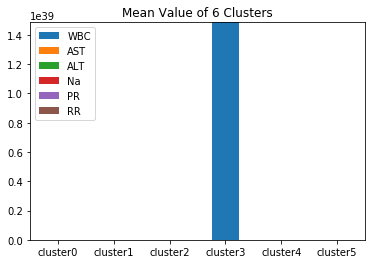

In [91]:
clusterinfo = pd.DataFrame()
for i in range(6):
    clusterinfo['cluster' + str(i)] = vital_blood_entdisease_split_replace_droppID[vital_blood_entdisease_split_replace_droppID['cluster_ID'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_ID')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 6 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)